In [1]:
import requests
import time
import random
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'}
url = 'https://www.coupang.com/vp/products/6795965704?itemId=12628460347&vendorItemId=79896126181&pickType=COU_PICK&q=%ED%95%98%EB%A6%BC+%EB%8B%AD%EA%B0%80%EC%8A%B4%EC%82%B4&itemsCount=36&searchId=18e6f70897d947fb8c6517c2cf59f437&rank=6&isAddedCart='


In [2]:
# 셀레늄으로 열기

options = webdriver.ChromeOptions()
options.add_argument('--disable-blink-features=AutomationControlled')
browser = webdriver.Chrome(options=options)
browser.get(url)
browser.maximize_window()

In [3]:
elem = browser.find_element(By.XPATH,'//*[@id="btfTab"]/ul[1]/li[2]').click()
time.sleep(2)

<html lang="ko-KR"><!--<![endif]--><head><style class="vjs-styles-defaults">
      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
    </style><script async="" src="https://connect.facebook.net/signals/config/652323801535981?v=2.9.156&amp;r=stable&amp;domain=www.coupang.com&amp;hme=c3a545c63044e8e9102d4f32d84a1137594d024f28e801d670bc76dc5c075575&amp;ex_m=67%2C112%2C99%2C103%2C58%2C3%2C93%2C66%2C15%2C91%2C84%2C49%2C51%2C158%2C161%2C172%2C168%2C169%2C171%2C28%2C94%2C50%2C73%2C170%2C153%2C156%2C165%2C166%2C173%2C121%2C14%2C48%2C178%2C177%2C123%2C17%2C33%2C38%2C1%2C41%2C62%2C63%2C64%2C68%2C88%2C16%2C13%2C90%2C87%2C86%2C100%2C102%2C37%2C101%2C29%2C25%2C154%2C157%2C130%2C27%2C10%2C11%2C12%2C5%2C6%2C24%2C21%2C22%2C54%2C59%2C61%2C71%2C95%2C26%2C72%2C8%2C7%2C76%2C46%2C20%2C97%2C96%2C9%2C19%2C18%2C81%2C53%2C79%2C32%2C70%2C0%2C89%2C31%2C78%2C83%2C45%2C44%2C82%2C36%2C4%2C85%2C77%2C42%2C39%2C34%2C80%2C2%2C35%2C60%2C40%2C98%2C4
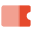
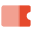
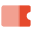
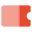

In [5]:
import requests

soup = BeautifulSoup(browser.page_source,'lxml')
soup


In [7]:
reviews = soup.find_all('article',{'class':'sdp-review__article__list js_reviewArticleReviewList'})
len(reviews) # 5개 -> 페이지 전환

5

In [9]:
# 리뷰어명
name = reviews[0].find('span',{'class':'sdp-review__article__list__info__user__name js_reviewUserProfileImage'}).text
name

'부스터다옹\xa0'

In [10]:
# 내용 : 데이터프레임에 넣어서 형태소분석, [-100:]
cont = reviews[0].find('div',{'class':'sdp-review__article__list__review__content js_reviewArticleContent'})
con

<div class="sdp-review__article__list__review__content js_reviewArticleContent">
                    
                        ----‐--------------‐-------------------<br/>
제가 직접 사용해보고 도움이 되시길 바라며 리뷰를 남겨봅니다! <br/>
개인의 주관적으로 작성한 리뷰이기에 참고 부탁드립니다!<br/>
-------------------‐-------------------<br/>
✅️상품명<br/>
하림 닭가슴살 블랙페퍼<br/>
✅️갯수 / 중량<br/>
8개입 / 800g<br/>
✅️보관방법<br/>
냉장보관<br/>
✅️원재료명<br/>
닭고기(닭가슴살:국내산)93.97%,정제수,대두유(콩기름:외국산),정제소금(국내산),설탕,미림,흑후추분말[흑후추:외국산(베트남,인도네시아,말레이시아 등)],복합허브추출물 SL,산도조절제1,산도조절제2,분말흰후추(흰후추원두:인도네시아산),블랙페퍼믹스파우더[흑후추분태(흑후추:베트남산)]<br/>
✅️특징<br/>
○●고소한 닭가슴살●○<br/>
간편하게 조리 후 즐기는 닭가슴살이에요. 쫄깃한 육질 속 고소한 육즙이 일품이죠. 결을 따라 쭉 찢어져 부드러운 식감을 즐기실 수 있답니다. 맛있게 조리하여 그대로 드시거나, 밥반찬이나 샐러드 등에 활요해 보세요.<br/>
<br/>
◇체크포인트◇<br/>
•안심할 수 있는 HACCP인증<br/>
•프리미엄 닭고기를 제공하는 하림<br/>
•쫄깃하고 야들얃들한 닭가슴살<br/>
•흑후추 분말 등을 더해 알싸한 향미<br/>
•냉장보관(-2~10도)<br/>
(하림 출처)<br/>
<br/>
** 필요했던 이유**<br/>
체중조절을 위해 닭가슴살을 매일 먹게 되어, 구매하게 되었어요! <br/>
<br/>
**직접 사용한 후기**<br/>
✔️좋았던 점(장점) <br/>
남편이 블랙페퍼 닭가슴살이 맛있다며 또 구매해달라고 해서, 저도 체중조절을